In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('../input/heart-disease-dataset/dataset.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d6c99e450>,
      dtype=object)

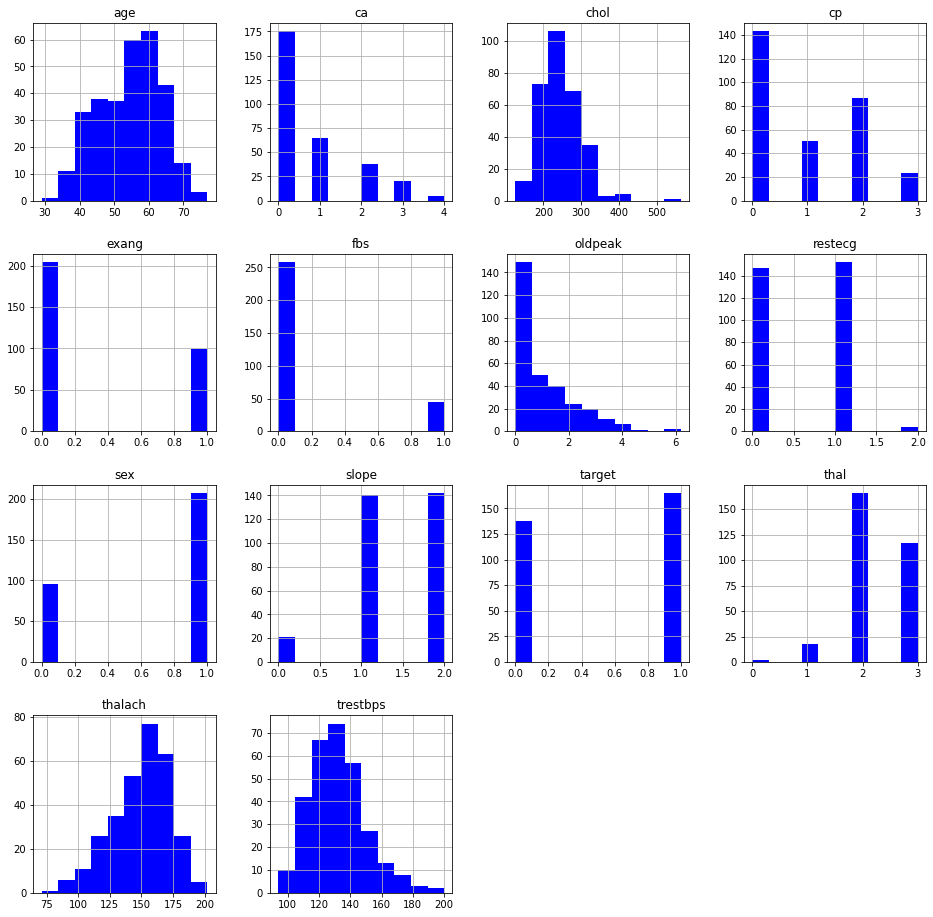

In [7]:
df.hist(figsize=(16,16),color=['b'])

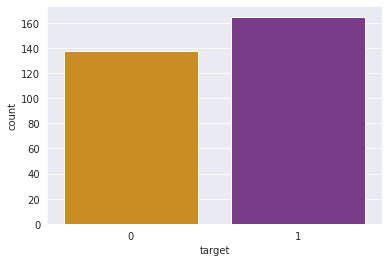

In [8]:
sns.set_style('darkgrid')

sns.countplot(x = 'target', data = df, palette = 'CMRmap_r')

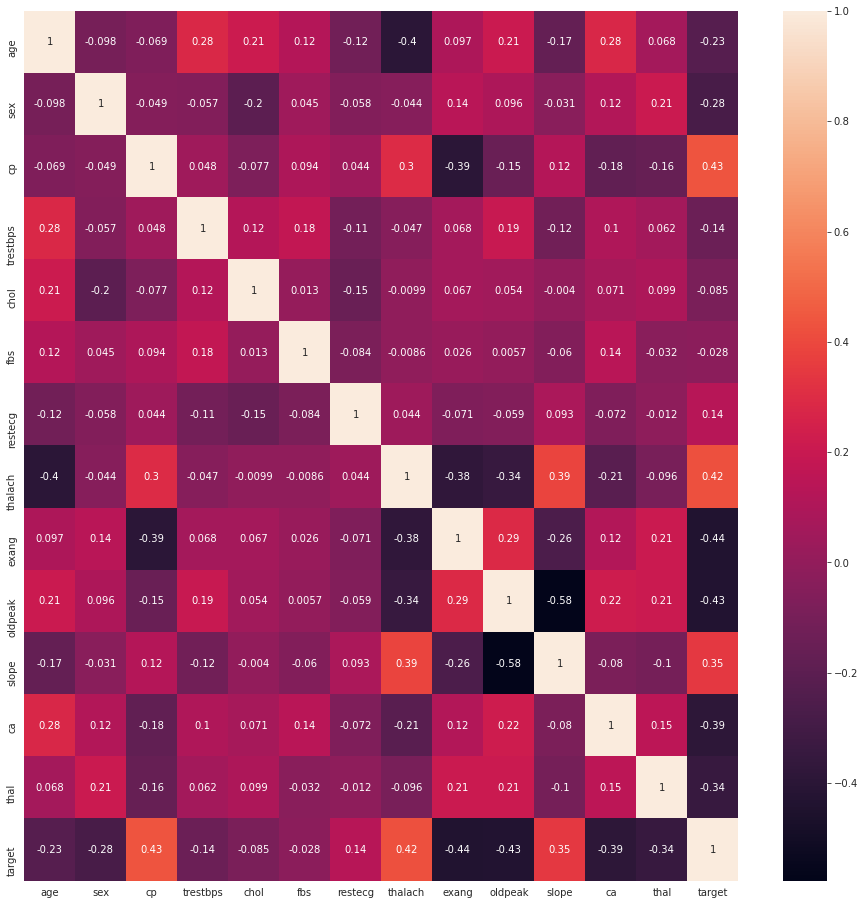

In [9]:
plt.figure(figsize = (16, 16))
 
sns.heatmap(df.corr(), annot = True)

plt.show()

In [10]:
xdata = df.drop(columns = 'target')

ydata = df['target']

In [11]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.10, random_state = 1)

print("Shape of xtrain :: ", xtrain.shape)

print("Shape of xtest :: ", xtest.shape)

print("Shape of ytrain :: ", ytrain.shape)

print("Shape of ytest :: ", ytest.shape)

Shape of xtrain ::  (272, 13)
Shape of xtest ::  (31, 13)
Shape of ytrain ::  (272,)
Shape of ytest ::  (31,)


In [12]:
from sklearn.preprocessing import StandardScaler
 
standard_scalar = StandardScaler()

xtrain = standard_scalar.fit_transform(xtrain)

xtest = standard_scalar.transform(xtest)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100)

rf_model

RandomForestClassifier()

In [14]:
rf_model.fit(xtrain, ytrain)

RandomForestClassifier()

In [15]:
rf_predicted_value = rf_model.predict(xtest)

rf_predicted_value

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1])

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
rf_score = accuracy_score(ytest, rf_predicted_value)

print("Score of the prediction by RandomForestClassifier is :: ", rf_score)

rf_accuracy = rf_score*100

print("Accuracy of the prediction by RandomForestClassifier is :: ", rf_accuracy, "%")

Score of the prediction by RandomForestClassifier is ::  0.9032258064516129
Accuracy of the prediction by RandomForestClassifier is ::  90.32258064516128 %


In [18]:
rf_report = classification_report(ytest, rf_predicted_value)

print("The Classification report for the Random Forest Classifier")

print("\n")

print(rf_report)

The Classification report for the Random Forest Classifier


              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.83      1.00      0.91        15

    accuracy                           0.90        31
   macro avg       0.92      0.91      0.90        31
weighted avg       0.92      0.90      0.90        31



In [19]:
rf_conf_matrix = confusion_matrix(ytest, rf_predicted_value)

print(rf_conf_matrix)

[[13  3]
 [ 0 15]]


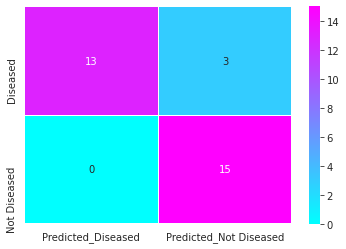

In [20]:
sns.heatmap(rf_conf_matrix, annot = True, cmap = 'cool', linewidths = 0.2, yticklabels = ['Diseased', 'Not Diseased'], xticklabels = ['Predicted_Diseased', 'Predicted_Not Diseased'])

In [21]:
feature_imp = pd.Series(rf_model.feature_importances_)

print(feature_imp)

indices = list(xdata.columns)

print(indices)

0     0.077964
1     0.040339
2     0.150740
3     0.071803
4     0.082068
5     0.007491
6     0.021269
7     0.131880
8     0.071530
9     0.108924
10    0.048792
11    0.097613
12    0.089587
dtype: float64
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [22]:
new_xdata = xdata.drop(columns = ['sex', 'trestbps', 'fbs', 'restecg', 'slope','thal'])

new_xdata.head()

,age,cp,chol,thalach,exang,oldpeak,ca
0,63,3,233,150,0,2.3,0
1,37,2,250,187,0,3.5,0
2,41,1,204,172,0,1.4,0
3,56,1,236,178,0,0.8,0
4,57,0,354,163,1,0.6,0


In [23]:
new_xtrain, new_xtest, new_ytrain, new_ytest = train_test_split(new_xdata, ydata, test_size = 0.10, random_state = 1)

print("Shape of new xtrain :: ", new_xtrain.shape)

print("Shape of new xtest :: ", new_xtest.shape)

print("Shape of new ytrain :: ", new_ytrain.shape)

print("Shape of new ytest :: ", new_ytest.shape)

Shape of new xtrain ::  (272, 7)
Shape of new xtest ::  (31, 7)
Shape of new ytrain ::  (272,)
Shape of new ytest ::  (31,)


In [24]:
new_rf_model = RandomForestClassifier(n_estimators = 100)

new_rf_model

RandomForestClassifier()

In [25]:
new_rf_model.fit(new_xtrain, new_ytrain)

RandomForestClassifier()

In [26]:
new_predicted_value = new_rf_model.predict(new_xtest)

new_predicted_value

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1])

In [27]:
new_score = accuracy_score(new_ytest, new_predicted_value)

print("New Score of the prediction by RandomForestClassifier is :: ", new_score)

new_accuracy = new_score*100

print("New Accuracy of the prediction by RandomForestClassifier is :: ", new_accuracy, "%")

New Score of the prediction by RandomForestClassifier is ::  0.8709677419354839
New Accuracy of the prediction by RandomForestClassifier is ::  87.09677419354838 %


In [28]:
new_rf_report = classification_report(ytest, new_predicted_value)

print("The Classification report for the New Random Forest Classifier")

print("\n")

print(new_rf_report)

The Classification report for the New Random Forest Classifier


              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.79      1.00      0.88        15

    accuracy                           0.87        31
   macro avg       0.89      0.88      0.87        31
weighted avg       0.90      0.87      0.87        31



In [29]:
new_conf_matrix = confusion_matrix(new_ytest, new_predicted_value)

print(new_conf_matrix)

[[12  4]
 [ 0 15]]


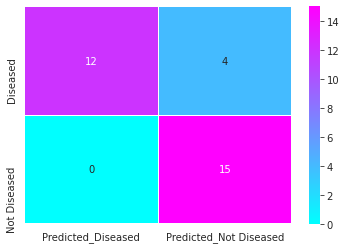

In [30]:
sns.heatmap(new_conf_matrix, annot = True, cmap = 'cool', linewidths = 0.2, yticklabels = ['Diseased', 'Not Diseased'], xticklabels = ['Predicted_Diseased', 'Predicted_Not Diseased'])

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 10)

knn_model

KNeighborsClassifier(n_neighbors=10)

In [32]:
knn_model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10)

In [33]:
knn_predicted_value = knn_model.predict(xtest)

knn_predicted_value

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1])

In [34]:
knn_score = accuracy_score(ytest, knn_predicted_value)

print("Score of the prediction by KNeighborsClassifier is :: ", knn_score)

knn_accuracy = knn_score*100

print("Accuracy of the prediction by KNeighborsClassifier is :: ", knn_accuracy, "%")

Score of the prediction by KNeighborsClassifier is ::  0.8709677419354839
Accuracy of the prediction by KNeighborsClassifier is ::  87.09677419354838 %


In [35]:
knn_report = classification_report(ytest, knn_predicted_value)

print("The Classification report for the KNeighbors Classifier")

print("\n")

print(knn_report)

The Classification report for the KNeighbors Classifier


              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.87      0.87      0.87        15

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



In [36]:
knn_conf_matrix = confusion_matrix(ytest, knn_predicted_value)

print(knn_conf_matrix)

[[14  2]
 [ 2 13]]


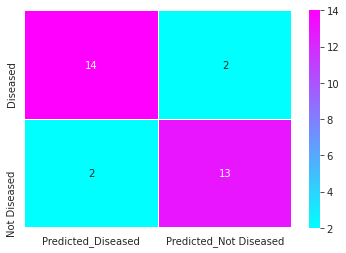

In [37]:
sns.heatmap(knn_conf_matrix, annot = True, cmap = 'cool', linewidths = 0.2, yticklabels = ['Diseased', 'Not Diseased'], xticklabels = ['Predicted_Diseased', 'Predicted_Not Diseased'])

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model

DecisionTreeClassifier()

In [39]:
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [40]:
dt_predicted_value = dt_model.predict(xtest)

dt_predicted_value

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1])

In [41]:
dt_score = accuracy_score(ytest, dt_predicted_value)

print("Score of the prediction by DecisionTreeClassifier is :: ", dt_score)

dt_accuracy = dt_score*100

print("Accuracy of the prediction by DecisionTreeClassifier is :: ", dt_accuracy, "%")

Score of the prediction by DecisionTreeClassifier is ::  0.8064516129032258
Accuracy of the prediction by DecisionTreeClassifier is ::  80.64516129032258 %


In [42]:
dt_report = classification_report(ytest, dt_predicted_value)

print("The Classification report for the Decision Tree Classifier")

print("\n")

print(dt_report)

The Classification report for the Decision Tree Classifier


              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.76      0.87      0.81        15

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31



In [43]:
dt_conf_matrix = confusion_matrix(ytest, dt_predicted_value)

print(dt_conf_matrix)

[[12  4]
 [ 2 13]]


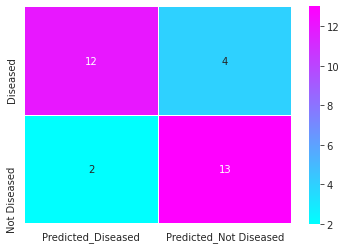

In [44]:
sns.heatmap(dt_conf_matrix, annot = True, cmap = 'cool', linewidths = 0.2, yticklabels = ['Diseased', 'Not Diseased'], xticklabels = ['Predicted_Diseased', 'Predicted_Not Diseased'])

In [45]:
from sklearn.tree import export_graphviz

from IPython.display import Image

from io import StringIO

import pydot

In [46]:
indices

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

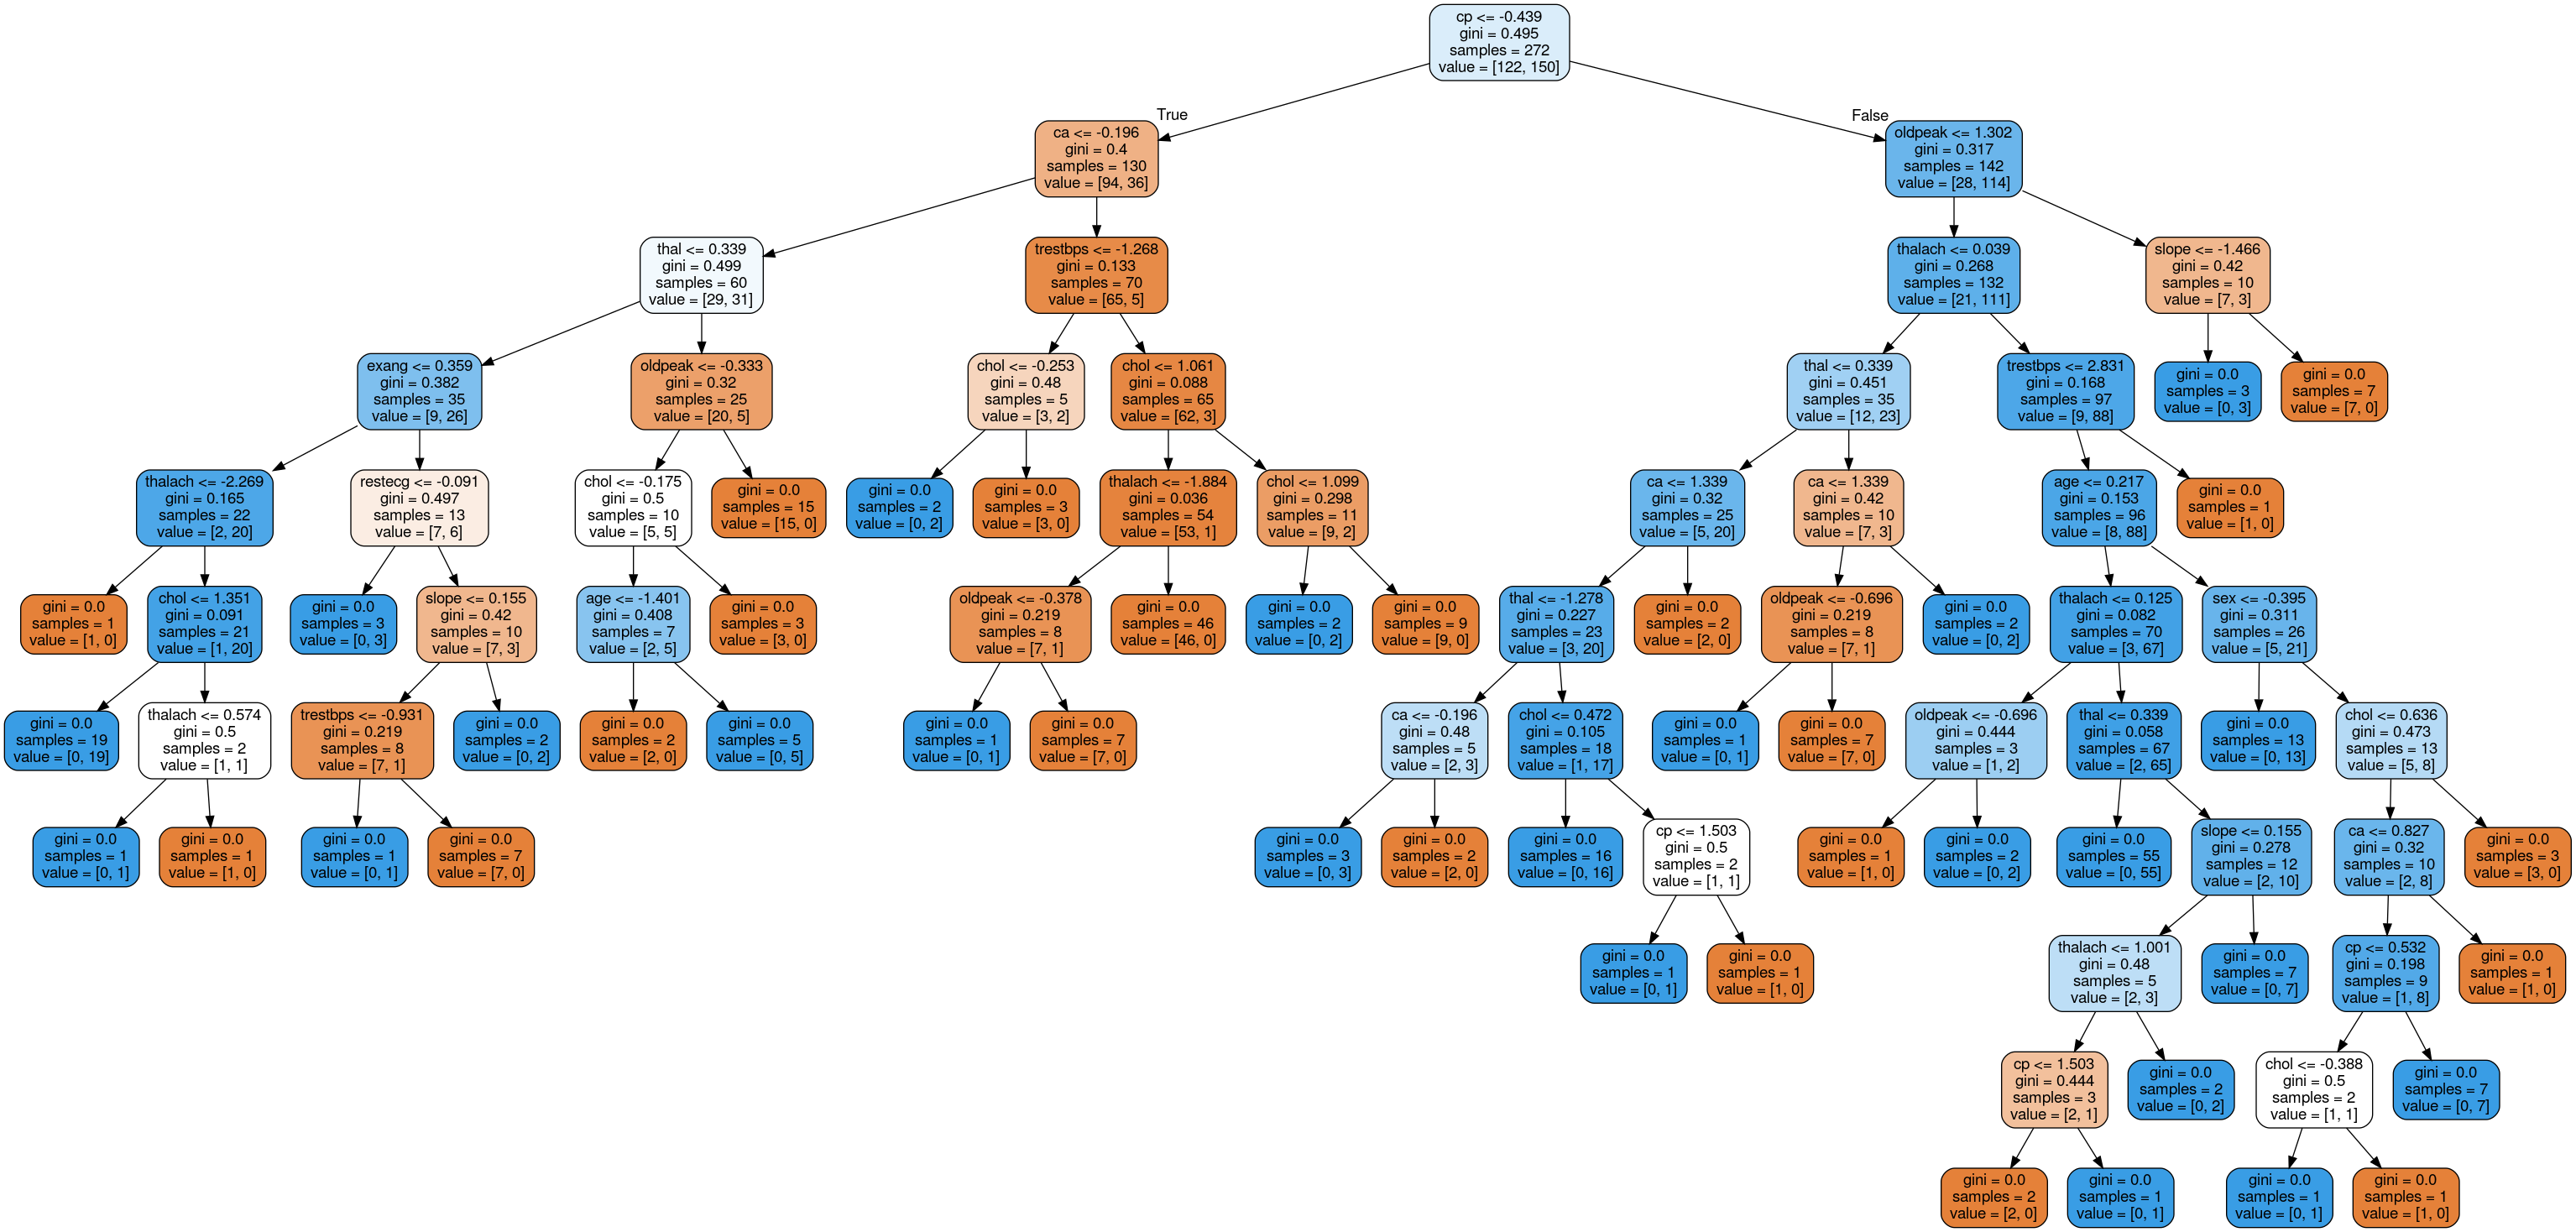

In [47]:
dot_data = StringIO()

export_graphviz(dt_model, out_file = dot_data, feature_names = indices, filled = True, rounded = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png())

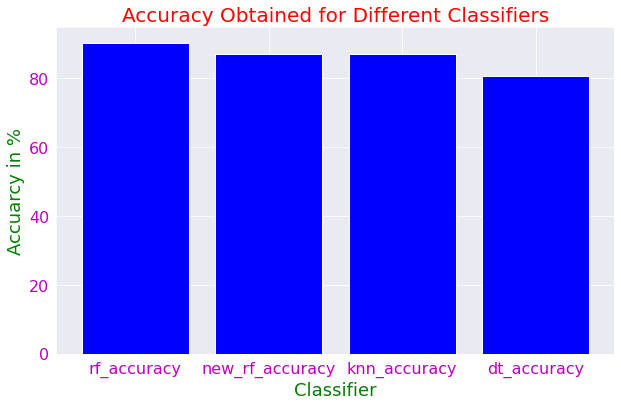

In [48]:
x = [('rf_accuracy', rf_accuracy), ('new_rf_accuracy', new_accuracy), ('knn_accuracy', knn_accuracy), ('dt_accuracy', dt_accuracy)]

labels, values = zip(*x)
 
plt.figure(figsize = (10, 6))

plt.bar(labels, values, color = 'b')

plt.xticks(color = 'm', fontsize = 16)

plt.yticks(color = 'm', fontsize = 16)

plt.xlabel('Classifier', color = 'g', fontsize = 18)

plt.ylabel('Accuarcy in %', color = 'g', fontsize = 18)

plt.title('Accuracy Obtained for Different Classifiers', color = 'r', fontsize = 20)

plt.show()